


#Cifar-10 Image Classifiction

The CIFAR-10 dataset consists of 60000 32x32 color images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The images are very small (32x32) and by visualizing them you will notice how difficult it is to distinguish them even for a human.

In this we are going to build a CNN model that can classify images of various objects. We have 10 class of images:

Airplane,
Automobile,
Bird,
Cat,
Deer,
Dog,
Frog,
Horse,
Ship,
Truck.





In [ ]:
# Input necessary packages
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.utils import plot_model
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array


#Load Data

In [ ]:
#data set preparation and normalization.
(X_train,y_train),(X_test,y_test) = cifar10.load_data()# load cifar10 dataset.
X_train, X_test = X_train/255.0 , X_test/255.0
#Normalize our pixel value of the picture by dividing 255.0.

In [ ]:
#Create a list that stores all avaliable categories
category = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

#Data Visualization

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


<ipython-input-81-4554bac05cb7>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label_index = int(y_train[index])


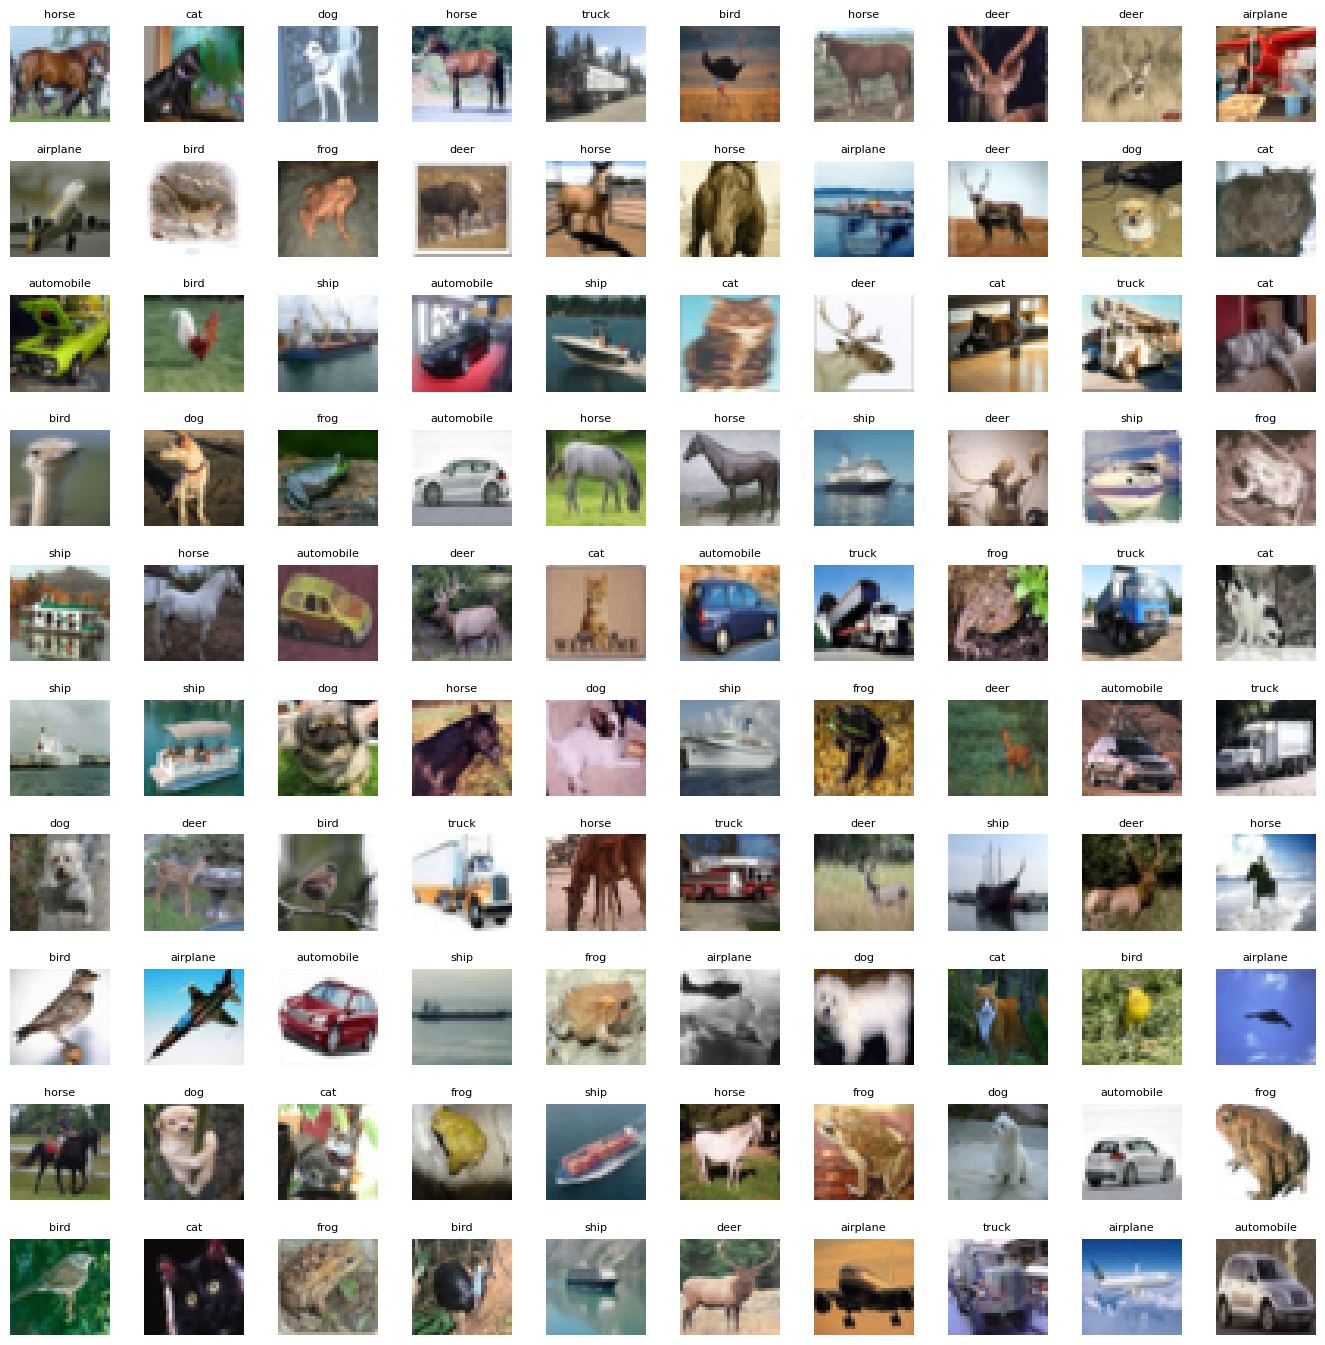

In [ ]:
# Define the labels of the dataset
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
          'dog', 'frog', 'horse', 'ship', 'truck']

# Let's view more images in a grid format
# Define the dimensions of the plot grid
W_grid = 10
L_grid = 10

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_train = len(X_train) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index
    axes[i].imshow(X_train[index,1:])
    label_index = int(y_train[index])
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

#Data Preprocessing

In [ ]:
# Convert target labels to one-hot coded vectors
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [ ]:
#We print out how many categories and how many pictures are in each sets.
num_categoty = y_test.shape[1]
stat = "category: " + str(num_categoty) + ", ytr: "+ str(len(y_train)) + ", yte:"+ str(len(y_test)) + ", xtr: "+ str(len(X_train)) +", xte: "+str(len(X_test))
print(stat)

category: 10, ytr: 50000, yte:10000, xtr: 50000, xte: 10000


In [ ]:
#Preapre the validation & traning set
X_val = X_train[-10000:]
y_val = y_train[-10000:]
X_train = X_train[:-10000]
y_train = y_train[:-10000]

#Model Building

In [ ]:
#Initialize and build the model with multiple layers.
model =models.Sequential()
model.add(Conv2D(32,(3,3), input_shape = (32, 32, 3), activation = 'relu'))
model.add(MaxPooling2D(strides = (2, 2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(strides=(2,2)))
model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(num_categoty,activation='softmax'))
model.compile(loss="mean_squared_error", optimizer= 'adam',metrics=['accuracy'])



In [ ]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 32)          18464     
                                                                 
 dropout_1 (Dropout)         (None, 4, 4, 32)         

#Model fitting

In [ ]:
#Use fit to train the model and evaluate the performance.
output = model.fit(X_train, y_train, validation_data=(X_val,y_val),epochs=50,batch_size=32)
scores = model.evaluate(X_test, y_test,verbose=0)
print("The accuracy is "+ str(scores[1])) #The accuracy on test dataset.

Epoch 1/50
1250/1250 [==============================] - 13s 8ms/step - loss: 0.0748 - accuracy: 0.3719 - val_loss: 0.0669 - val_accuracy: 0.4618
Epoch 2/50
1250/1250 [==============================] - 8s 6ms/step - loss: 0.0631 - accuracy: 0.5053 - val_loss: 0.0596 - val_accuracy: 0.5470
Epoch 3/50
1250/1250 [==============================] - 6s 5ms/step - loss: 0.0585 - accuracy: 0.5479 - val_loss: 0.0537 - val_accuracy: 0.5946
Epoch 4/50
1250/1250 [==============================] - 5s 4ms/step - loss: 0.0545 - accuracy: 0.5869 - val_loss: 0.0523 - val_accuracy: 0.6070
Epoch 5/50
1250/1250 [==============================] - 6s 5ms/step - loss: 0.0519 - accuracy: 0.6105 - val_loss: 0.0489 - val_accuracy: 0.6354
Epoch 6/50
1250/1250 [==============================] - 5s 4ms/step - loss: 0.0495 - accuracy: 0.6293 - val_loss: 0.0479 - val_accuracy: 0.6395
Epoch 7/50
1250/1250 [==============================] - 6s 5ms/step - loss: 0.0481 - accuracy: 0.6420 - val_loss: 0.0471 - val_accuracy

#Model Evaluation

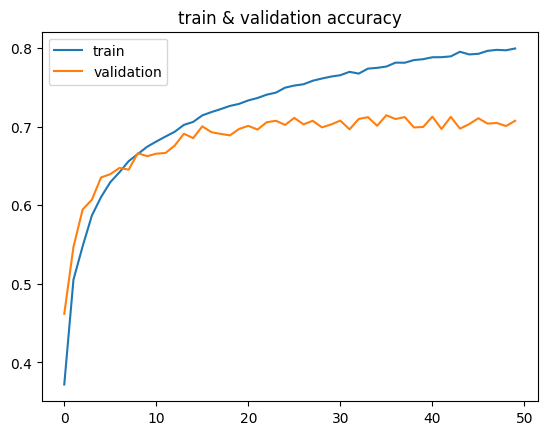

In [ ]:
#Plot of train & validation accuracy
plt.plot(output.history['accuracy'])
plt.plot(output.history['val_accuracy'])
plt.title('train & validation accuracy')
plt.legend(['train','validation'])
plt.show()


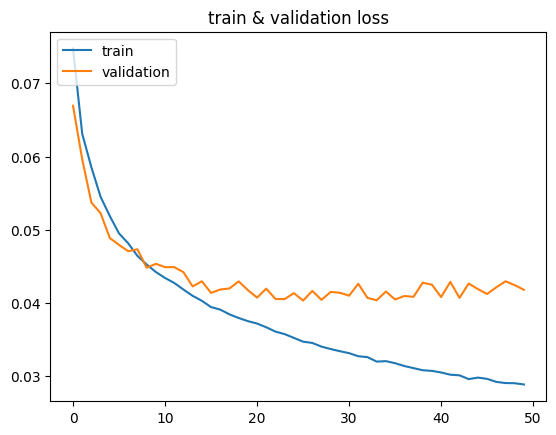

In [ ]:
#Plot of train & validation loss
plt.plot(output.history['loss'])
plt.plot(output.history['val_loss'])
plt.title('train & validation loss')
plt.legend(['train','validation'],loc='upper left')
plt.show()

#Test on one image

In [ ]:
#load google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Save the model
model.save('CIFAR-10.h5')

In [ ]:
#Load the model from googl drive.
from tensorflow import keras
model = keras.models.load_model('/content/CIFAR-10.h5')


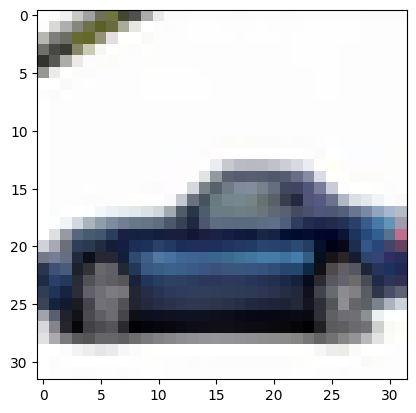

In [ ]:
#We print out a picture from the dataset to see the category by ourself and then use it for test
#the model.
plt.imshow(X_test[105])

In [ ]:
print(y_test[105])

[1]


In [ ]:
# Modifying the size for prediction
img_array = img_to_array(X_test[105])
img_array = np.expand_dims(img_array,axis=0)

In [ ]:
#Predict the picture
prediction = model.predict(img_array)

1/1 [==============================] - 0s 30ms/step


In [ ]:
#Printout the category of the picture
predicted_class_index = np.argmax(prediction)
predicted_class_name = category[predicted_class_index]
print("The predicted categoty is:", predicted_class_name)

The predicted categoty is: automobile
